In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os

os.chdir("/content/drive/My Drive/MIMIC")
os.listdir("/content/drive/My Drive/MIMIC")

Mounted at /content/drive/


['Multi-Filter-Residual-Convolutional-Neural-Network',
 'LAAT',
 'LAAT_Run.ipynb',
 'Process_Data',
 'MResCNN_RUN.ipynb',
 'BERT_FineTune',
 'Transformer_MCP_1.ipynb',
 'Bert-Chinese-Text-Classification-Pytorch',
 'Transformer_MCP_3.ipynb',
 'caml-mimic',
 'MResCNN_RUN_2.ipynb',
 'CALM_RUN.ipynb',
 'Transformer_MCP_4.ipynb',
 'Transformer_MCP_2.ipynb',
 'FineTune_Visualization.ipynb',
 'mca_bert',
 'Does_Bert_Magic.ipynb',
 'Find_MN.ipynb',
 'transformersum',
 'Transformer_MCP_6_ClinicalBert + Heir.ipynb',
 'Transformer_MCP_7_longformer.ipynb',
 'Transformer_MCP_8_ClinicalBert512 + Heir.ipynb',
 'Transformer_MCP_5_Bert-based-model + Heir.ipynb',
 'Transformer_MCP_10_ClinicalBert512 + Heir + DataAug.ipynb',
 'Transformer_MCP_9_Bert-based-model + Heir + DataAug.ipynb',
 'Copy of Copy of Copy of Copy of Data_Augmentation.ipynb',
 'Copy of Data_Augmentation.ipynb',
 'Copy of Copy of Copy of Data_Augmentation (1).ipynb',
 'Copy of Copy of Data_Augmentation.ipynb',
 'Copy of Copy of Copy of 

In [ ]:
# import package
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据

In [ ]:
train_data_punct = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_punct.csv')
test_data_punct = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_punct.csv')
dev_data_punct = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/dev_50_punct.csv')

train_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50.csv')
test_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50.csv')
dev_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/dev_50.csv')


In [ ]:
def add_punct(text):
  result = ''
  text_list = text.split(' ')
  for index in range(len(text_list)-1):
    if text_list[index].istitle():
      result = result + ' . '+ text_list[index]
    else:
      result = result + ' ' + text_list[index]
  return result

In [ ]:
def split_text(word_list,length):
  result = []
  # 我们先正向切句子
  chunk = ''
  for index in range(len(word_list)):
    chunk = chunk + ' ' + word_list[index]
    if index > 0 and index % length == 0: #我们已经记录了1200个单词
      result.append(chunk.strip())
      chunk = ''
  # 当最后 跑出循环时，chunk 还有内容，我们也加上
  if chunk != '' and len(chunk.split(' ')) >= 100:
    result.append(chunk.strip())
    chunk = ''
  return result

In [ ]:
train_data_punct.iloc[-1]

SUBJECT_ID                                                52139
HADM_ID                                                  137090
TEXT          Admission Date Discharge Date Date of Birth Se...
LABELS           511.9;287.5;486;272.4;995.92;401.9;38.93;038.9
length                                                     7567
Name: 8065, dtype: object

# Text Data Augmentation

In [ ]:
! pip install numpy requests nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 14.6 MB/s 


In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [ ]:
text = 'The quick brown fox jumps over the lazy dog .'
print(text)

The quick brown fox jumps over the lazy dog .


In [ ]:
aug = naw.SynonymAug(aug_src='wordnet')

In [ ]:
text = 'predominantly fixed perfusion defect in the lad territory hospital1'
augmented_text = aug.augment(text)

print(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

predominantly fixed perfusion defect in the lad territory hospital1
Original:
predominantly fixed perfusion defect in the lad territory hospital1
Augmented Text:
['predominantly fixed perfusion shortcoming in the lad territory hospital1']


# 统计数据长度分布

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


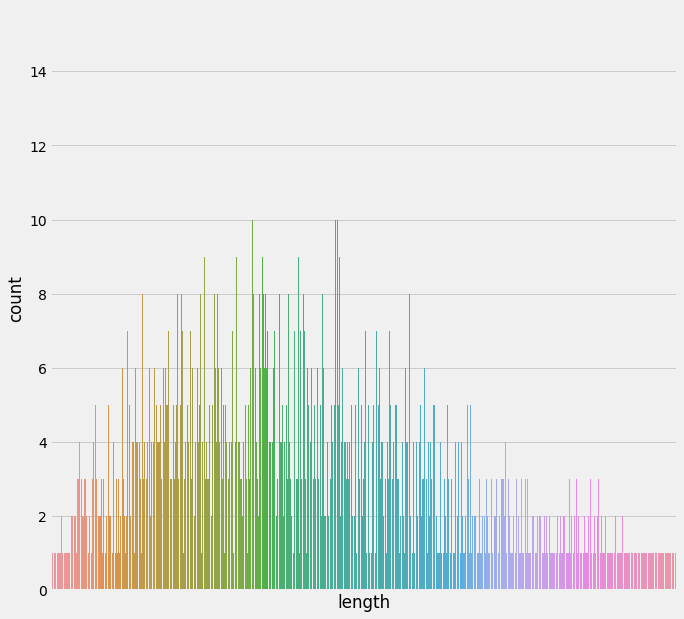

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


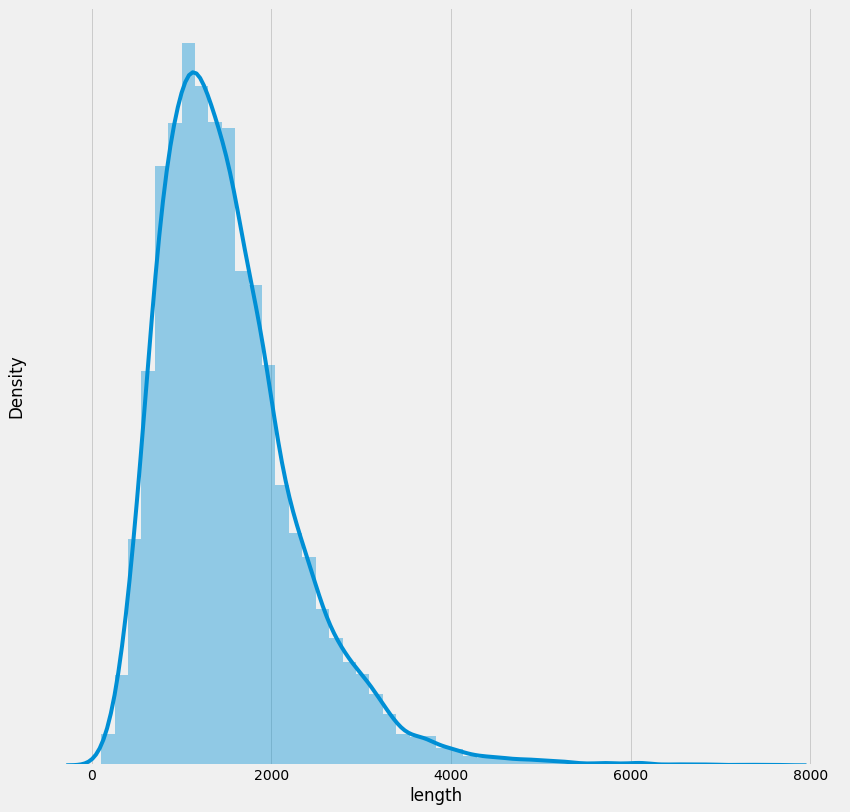

'\n# 绘制句子长度列的数量分布图\nplt.subplots(figsize=(10, 10))\nsns.countplot("length", data=train_data)\n \n# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看\nplt.xticks([])\nplt.show()\n \n# 绘制dist长度分布图\nplt.subplots(figsize=(10, 10))\nsns.distplot(train_data["length"])\n \n# 主要关注dist长度分布横坐标, 不需要绘制纵坐标\nplt.yticks([])\n'

In [ ]:
# 设置显示风格
plt.style.use('fivethirtyeight')

plt.subplots(figsize=(10, 10))
# 绘制句子长度列的数量分布图
sns.countplot("length", data=train_data)
# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

# 绘制dist长度分布图
# plt.subplots(figsize=(7, 7))
fig,ax = plt.subplots(figsize=(13, 13))
sns.distplot(train_data["length"])
 
# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


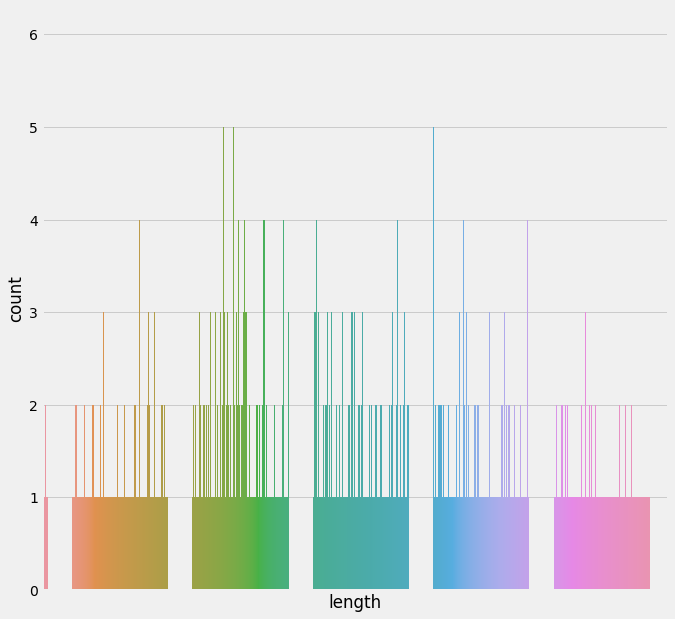

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


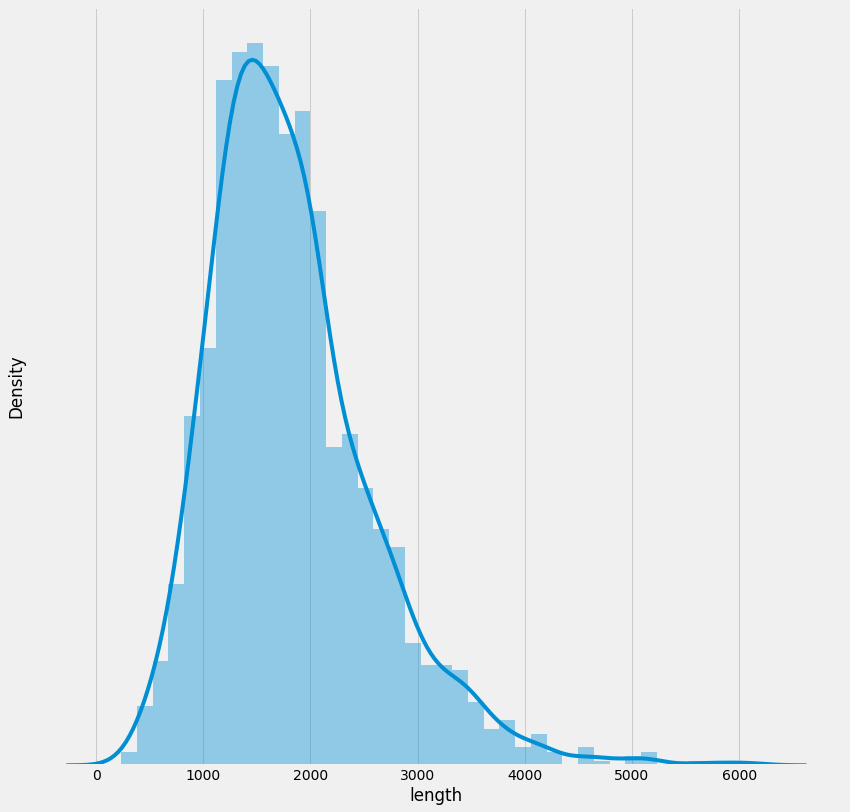

In [ ]:
# 设置显示风格
plt.style.use('fivethirtyeight')

plt.subplots(figsize=(10, 10))
# 绘制句子长度列的数量分布图
sns.countplot("length", data=test_data)
# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

# 绘制dist长度分布图
# plt.subplots(figsize=(7, 7))
fig,ax = plt.subplots(figsize=(13, 13))
sns.distplot(test_data["length"])
 
# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()

In [ ]:
dev_data[:5]

,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
0,86006,111912,admission date discharge date date of birth se...,V58.61;401.9;96.71;427.31;414.01,230
1,85950,189769,admission date discharge date service neurosur...,403.90;585.9;250.00;V45.81;96.71,304
2,88025,180431,admission date discharge date date of birth se...,96.71;38.93;518.81,359
3,83776,152868,admission date discharge date date of birth se...,401.9;96.71;518.81;272.4,408
4,85055,169373,admission date discharge date date of birth se...,99.04;96.71,409


In [ ]:
dev_data[-5:]

# extractive text summarization by a pre-trained model

In [ ]:
os.chdir("/content/drive/My Drive/MIMIC/transformersum")
#!tar -xzvf ./datasets/roberta-base.tar.gz

In [ ]:
! pip install pytorch_lightning
! pip install transformers
! pip install torch_optimizer
! pip install wandb
! pip install rouge-score
! pip install packaging
! pip install datasets
! pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 706 kB 7.7 MB/s 
     |████████████████████████████████| 5.9 MB 50.7 MB/s 
     |████████████████████████████████| 419 kB 60.4 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.10.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 9.0 MB/s 
     |████████████████████████████████| 6.6 MB 42.3 MB/s 
     |████████████████████████████████| 

In [ ]:
import sys
sys.path.append("/content/drive/My Drive/MIMIC/transformersum/src")  # 注意，这里改变了地址了
from extractive import ExtractiveSummarizer 

In [ ]:
os.chdir("/content/drive/My Drive/MIMIC/transformersum")

In [ ]:
# model_long = ExtractiveSummarizer.load_from_checkpoint("./models/longformer/epoch=0-step=20000.ckpt")
model_roberta = ExtractiveSummarizer.load_from_checkpoint("./models/epoch=3.ckpt",strict=False)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/saving.py:264: UserWarning: Found keys that are in the model state dict but not in the checkpoint: ['word_embedding_model.embeddings.position_ids']
  f"Found keys that are in the model state dict but not in the checkpoint: {keys.missing_keys}"


In [ ]:
#add_punct(text_2_500)
#model_long.predict(add_punct(text_2_500),num_summary_sentences=2)
#model_roberta.predict(add_punct(text_2_500),num_summary_sentences=5)

' .Admission.Date.Discharge.Date.Date of.Birth.Sex.M.Service MEDICINE.Allergies.Beta.Blockers.Beta.Adrenergic.Blocking.Agts.Attending.First.Name3 LF.Chief.Complaint.Chest.Pain.Major.Surgical or.Invasive.Procedure.First.Name3 LF ECMO RIJ.History of.Present.Illness.Mr.Known lastname is a year old with a PMH significant for DM HTN a fib with LV thrombus on coumadin PHTN and non ischemic cardiomyopathy and CHF with an EF of from s p cath in that showed occlusion in RCA who presented to clinic today with days of chest pain to with associated cough but no shortness of breath.His pain was not associated with exertion as he has been pretty sedentary at home because of his condition.He has no energy and is unable to do much over the last few months.At his PCPs office he was feeling unwell with constant non radiating chest pain that was centrally located and persistent.He had not taken any medications at the time of the appointment.Dr.First.Name STitle checked an EKG that showed a rate of that w

In [ ]:
def clean_text(text):
  # 最后我们把抽好的摘要做一下处理，去调句号，把所有的词改为小写
  result_clean = ''
  for word in text.split(' '):
    if word != '.' and word != '':
      result_clean = result_clean + ' ' +word.strip().lower()
  return result_clean.strip()

def get_summary(text,length): # 给定一个句子，我们试图把句子浓缩到length个词
  # 注意，我们的 text 必须是 有 '.' 以及 区分大小写的
  # 注意，由于我们吊桶 trasformersum 里的模型，必须保证我们使用的文本区分大小写，有句号
  # 首先，我们把text 分成200个词左右的一个个小区域
  text_chunks = []
  last_middle_sentence = ''
  middle_sentence = ''
  for sentence in text.split('.'):
    middle_sentence = middle_sentence + ' . ' + sentence
    if len(middle_sentence.split(' ')) >= 250:
      text_chunks.append(last_middle_sentence)
      last_middle_sentence = ''
      middle_sentence = ''
    else:
      last_middle_sentence = middle_sentence
  if middle_sentence != '' and len(middle_sentence.split(' ')) > 50:
    text_chunks.append(middle_sentence)
  # 其次，我们在一个个小区域里进行文本摘要生成,我们希望摘要的长度控制在 length 个词以内
  summary = ''
  for chunk in text_chunks:
    summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=6)
  summary = clean_text(summary)
  #print(len(summary.split(' ')))
  
  result = ''
  if len(summary.split(' ')) >= 1000 and len(summary.split(' ')) <= 1250:  # 如果抽出的 摘要长度在 1000 - 1400 之间，之间返回
    #print('1000 - 1250')
    #print(len(summary.split(' ')))
    result = clean_text(summary)
    #print(len(result.split(' ')))
  elif len(summary.split(' ')) < 800:
    #print('< 800')
    #print(len(summary.split(' ')),'num_chunk:',len(text_chunks))
    summary = ''
    for chunk in text_chunks:
      summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=10)
    result = clean_text(summary)
    #print(len(result.split(' ')))
  elif len(summary.split(' ')) < 1000 and len(summary.split(' ')) > 800:
    #print('< 1000')
    #print(len(summary.split(' ')),'num_chunk:',len(text_chunks))
    summary = ''
    for chunk in text_chunks:
      summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=9)
    result = clean_text(summary)
    #print(len(result.split(' ')))
  '''
  elif len(summary.split(' ')) > 1250 and len(summary.split(' ')) < 1400:
    #print('>1250, < 1400')
    #print(len(summary.split(' ')),'num_chunk:',len(text_chunks))
    summary = ''
    for chunk in text_chunks:
      summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=5)
    result = clean_text(summary)
    #print(len(result.split(' ')))
  elif len(summary.split(' ')) > 1400:
    #print('>1400')
    #print(len(summary.split(' ')),'num_chunk:',len(text_chunks))
    summary = ''
    for chunk in text_chunks:
      summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=3)
    result = clean_text(summary)
    #print(len(result.split(' ')))
  '''
  return result

# Train Model

In [ ]:
os.chdir("/content/drive/My Drive/MIMIC/transformersum")

In [ ]:
! python ./src/main.py \
  --model_name_or_path allenai/led-base-16384 \
  --model_type bert \
  --data_path ./datasets/roberta-base/ \
  --max_epochs 3 \
  --accumulate_grad_batches 2 \
  --warmup_steps 2300 \
  --max_steps 20000 \
  --gradient_clip_val 1.0 \
  --optimizer_type adamw \
  --use_scheduler linear \
  --do_train --do_test \
  --batch_size 4 \
  --data_type pt \
  --dataloader_type iterable \
  --no_use_token_type_ids

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/transformers/data/metrics/__init__.py:36: FutureWarning: This metric will be removed from the library soon, metrics should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/data/metrics/__init__.py:42: FutureWarning: This metric will be removed from the library soon, metrics should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/data/metrics/__init__.py:36: FutureWarning: This metric will be remov

# Data Augamentation

In [ ]:
############# 针对训练数据进行增强  ###########################
DAsplit_train_data = [[],    # SUBJECT_ID
                 [],    # HADM_ID
                 [],    # TEXT
                 [],    # LABELS
                 []]    # length

for index in range(len(train_data['TEXT']) ):  # len(train_data['TEXT']) 
  # 拿到一份样本的所有训练数据
  raw_info = train_data.iloc[index]
  subject_id = raw_info[0]
  hadm_id = raw_info[1]
  text = raw_info[2]
  labels= str(raw_info[3])
  length = raw_info[4]
  
  if len(text.split(' ')) > 1200 and len(text.split(' ')) < 1600: # 如果文本本身足够短，在1200个词以内，我们就不进行 文本增强 
    DAsplit_train_data[0].append(subject_id)
    DAsplit_train_data[1].append(hadm_id)
    DAsplit_train_data[2].append(text)
    DAsplit_train_data[3].append(labels)
    DAsplit_train_data[4].append(len(text.split(' ')))
    print('finish:',index)

# transform to dataframe_data
DAsplit_train_data_dict =  {'SUBJECT_ID':DAsplit_train_data[0],
                            'HADM_ID':DAsplit_train_data[1],
                            'TEXT':DAsplit_train_data[2],
                            'LABELS':DAsplit_train_data[3],
                            'length':DAsplit_train_data[4]}
DAsplit_train_data_pd = pd.DataFrame.from_dict(DAsplit_train_data_dict)
DAsplit_train_data_pd.to_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_pro_bu.csv')

finish: 3129
finish: 3130
finish: 3131
finish: 3132
finish: 3133
finish: 3134
finish: 3135
finish: 3136
finish: 3137
finish: 3138
finish: 3139
finish: 3140
finish: 3141
finish: 3142
finish: 3143
finish: 3144
finish: 3145
finish: 3146
finish: 3147
finish: 3148
finish: 3149
finish: 3150
finish: 3151
finish: 3152
finish: 3153
finish: 3154
finish: 3155
finish: 3156
finish: 3157
finish: 3158
finish: 3159
finish: 3160
finish: 3161
finish: 3162
finish: 3163
finish: 3164
finish: 3165
finish: 3166
finish: 3167
finish: 3168
finish: 3169
finish: 3170
finish: 3171
finish: 3172
finish: 3173
finish: 3174
finish: 3175
finish: 3176
finish: 3177
finish: 3178
finish: 3179
finish: 3180
finish: 3181
finish: 3182
finish: 3183
finish: 3184
finish: 3185
finish: 3186
finish: 3187
finish: 3188
finish: 3189
finish: 3190
finish: 3191
finish: 3192
finish: 3193
finish: 3194
finish: 3195
finish: 3196
finish: 3197
finish: 3198
finish: 3199
finish: 3200
finish: 3201
finish: 3202
finish: 3203
finish: 3204
finish: 3205

In [ ]:
import pandas as pd
train_data_pro_1 = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_pro_0to6400.csv',usecols=[1,2,3,4,5])
train_data_pro_2 = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_pro_6400to7100.csv',usecols=[1,2,3,4,5])
train_data_pro_3 = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_pro_7100to7500.csv',usecols=[1,2,3,4,5])
train_data_pro_4 = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_pro_7500to7800.csv',usecols=[1,2,3,4,5])
train_data_pro_5 = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_pro_7800toend.csv',usecols=[1,2,3,4,5])
train_data_pro_6 = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_pro_bu.csv',usecols=[1,2,3,4,5])
train_data_pro = pd.concat([train_data_pro_1,train_data_pro_2,train_data_pro_3,train_data_pro_4,train_data_pro_5,train_data_pro_6],axis=0)

In [58]:
# 拿到 train_data_punct 的原始numpy 型数据
train_data_np_punct = [[],    # SUBJECT_ID
                 [],    # HADM_ID
                 [],    # TEXT
                 [],    # LABELS
                 []]    # length

for index in range(len(train_data_punct['TEXT']) ):
  # 拿到一份样本的所有训练数据
  raw_info = train_data_punct.iloc[index]
  train_data_np_punct[0].append(raw_info[0])
  train_data_np_punct[1].append(raw_info[1])
  train_data_np_punct[2].append(raw_info[2])
  train_data_np_punct[3].append(str(raw_info[3]))
  train_data_np_punct[4].append(raw_info[4])

# 拿到 经过一边处理的数据
train_data_pro_first = [[],    # SUBJECT_ID
                 [],    # HADM_ID
                 [],    # TEXT
                 [],    # LABELS
                 []]    # length

for index in range(len(train_data_pro['TEXT']) ):
  # 拿到一份样本的所有训练数据
  raw_info = train_data_pro.iloc[index]
  train_data_pro_first[0].append(raw_info[0])
  train_data_pro_first[1].append(raw_info[1])
  train_data_pro_first[2].append(raw_info[2])
  train_data_pro_first[3].append(str(raw_info[3]))
  train_data_pro_first[4].append(raw_info[4])

# 检查处理的数据，如果文本长度过短，首尾拼接
num = 0
train_data_pro_second = [[],    # SUBJECT_ID
                 [],    # HADM_ID
                 [],    # TEXT
                 [],    # LABELS
                 []]    # length
for index_i in range(len(train_data_pro_first[0])):
  if train_data_pro_first[4][index_i] >= 800:
    train_data_pro_second[0].append(train_data_pro_first[0][index_i])
    train_data_pro_second[1].append(train_data_pro_first[1][index_i])
    train_data_pro_second[2].append(train_data_pro_first[2][index_i])
    train_data_pro_second[3].append(train_data_pro_first[3][index_i])
    train_data_pro_second[4].append(train_data_pro_first[4][index_i])
  else: # 找到raw text
    raw_text = ''
    for index_j in range(len(train_data_np_punct[0])):
      if train_data_np_punct[0][index_j] == train_data_pro_first[0][index_i] and \
        train_data_np_punct[1][index_j] == train_data_pro_first[1][index_i] :
        raw_text = train_data_np_punct[2][index_j]
    # 开始判断这段短句子
    if (len(raw_text.split(' ')) - train_data_pro_first[4][index_i]) < 100:
      train_data_pro_second[0].append(train_data_pro_first[0][index_i])
      train_data_pro_second[1].append(train_data_pro_first[1][index_i])
      train_data_pro_second[2].append(train_data_pro_first[2][index_i])
      train_data_pro_second[3].append(train_data_pro_first[3][index_i])
      train_data_pro_second[4].append(train_data_pro_first[4][index_i])
    else:
      tail_head = str(train_data_pro_first[2][index_i]) + ' ' + raw_text
      combide_text = ''
      num = 0
      for word in tail_head.split(' '):
        if num < 1250:
          combide_text = combide_text + ' ' + word
          num += 1
        else:
          break

      train_data_pro_second[0].append(train_data_pro_first[0][index_i])
      train_data_pro_second[1].append(train_data_pro_first[1][index_i])
      train_data_pro_second[2].append(combide_text)
      train_data_pro_second[3].append(train_data_pro_first[3][index_i])
      train_data_pro_second[4].append(len(combide_text.split(' ')))
      print('index:',index_i,'raw length:',len(raw_text.split(' ')),
            'pro first length:',train_data_pro_first[4][index_i],
            'pro second length:',len(combide_text.split(' ')))





index: 3130 raw length: 1601 pro first length: 400 pro second length: 1251
index: 3132 raw length: 1601 pro first length: 400 pro second length: 1251
index: 3134 raw length: 1602 pro first length: 401 pro second length: 1251
index: 3136 raw length: 1602 pro first length: 401 pro second length: 1251
index: 3138 raw length: 1603 pro first length: 402 pro second length: 1251
index: 3140 raw length: 1603 pro first length: 402 pro second length: 1251
index: 3142 raw length: 1603 pro first length: 402 pro second length: 1251
index: 3144 raw length: 1603 pro first length: 402 pro second length: 1251
index: 3146 raw length: 1603 pro first length: 402 pro second length: 1251
index: 3148 raw length: 1603 pro first length: 402 pro second length: 1251
index: 3150 raw length: 1604 pro first length: 403 pro second length: 1251
index: 3152 raw length: 1604 pro first length: 403 pro second length: 1251
index: 3154 raw length: 1604 pro first length: 403 pro second length: 1251
index: 3156 raw length: 1

In [59]:
# transform to dataframe_data
train_data_pro_second_dict =  {'SUBJECT_ID':train_data_pro_second[0],
                            'HADM_ID':train_data_pro_second[1],
                            'TEXT':train_data_pro_second[2],
                            'LABELS':train_data_pro_second[3],
                            'length':train_data_pro_second[4]}
train_data_pro_second_pd = pd.DataFrame.from_dict(train_data_pro_second_dict)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


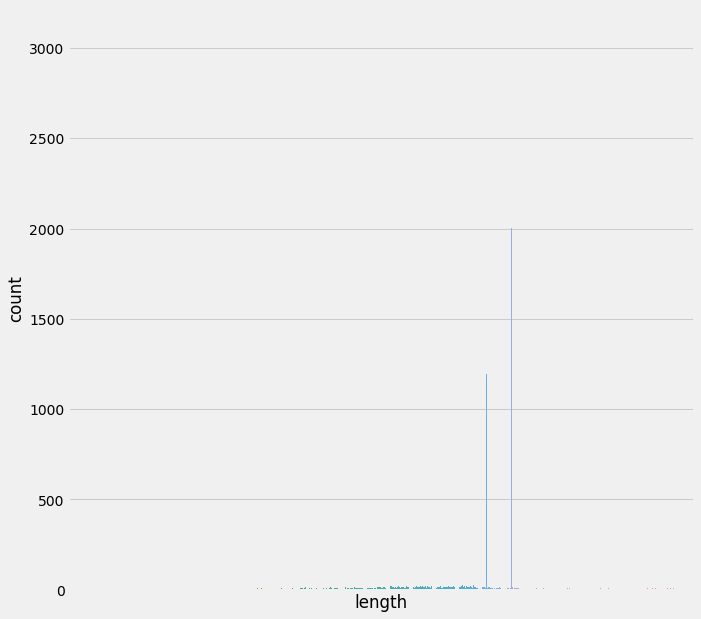

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


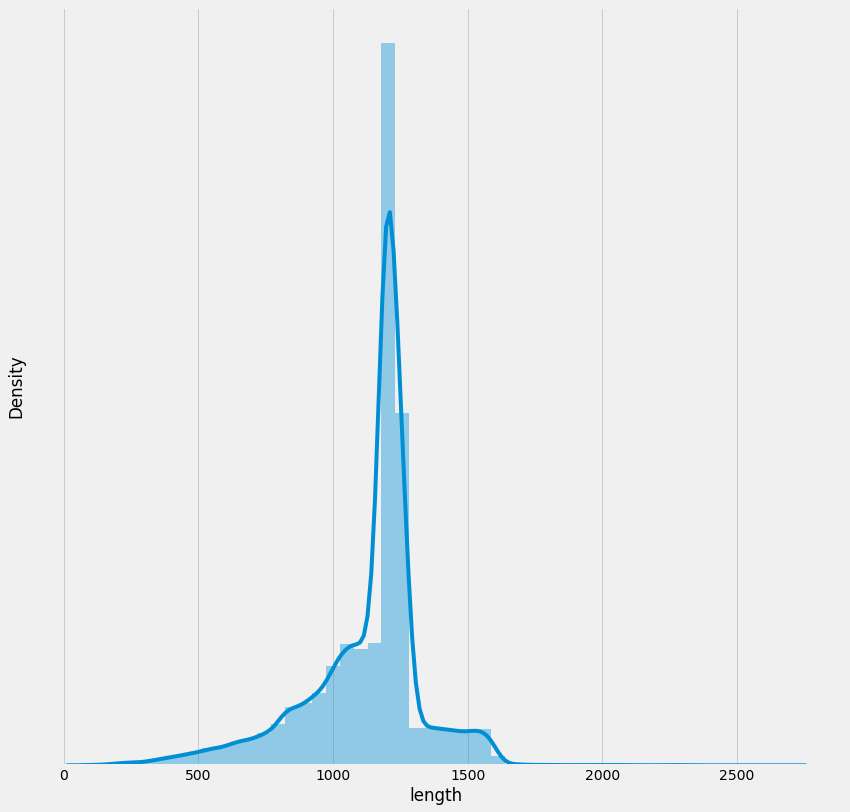

In [60]:
# 设置显示风格
plt.style.use('fivethirtyeight')

plt.subplots(figsize=(10, 10))
# 绘制句子长度列的数量分布图
sns.countplot("length", data=train_data_pro_second_pd )
# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

# 绘制dist长度分布图
# plt.subplots(figsize=(7, 7))
fig,ax = plt.subplots(figsize=(13, 13))
sns.distplot(train_data_pro_second_pd["length"])
 
# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()

In [75]:
train_data_pro_second_pd.to_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_pro2.csv',index=None)

In [66]:
train_data_pro_second_pd[6000:6010]

,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
6000,13871,149004,admission date discharge date date of birth se...,96.04;96.72,1201
6001,13871,149004,but patient did have bright red blood from th...,96.04;96.72,1251
6002,11962,113972,patient recorded as having complaint s p fall ...,96.04;96.71;96.6,1149
6003,11962,113972,admission date discharge date service med alle...,96.04;96.71;96.6,1201
6004,11962,113972,fall she was taken emergently to surgery and ...,96.04;96.71;96.6,1251
6005,65711,157883,complaint cardiac catheterization s p bms plac...,401.9;414.01;88.56;37.22,1067
6006,65711,157883,admission date discharge date date of birth se...,401.9;414.01;88.56;37.22,1201
6007,65711,157883,there is borderline pulmonary artery systolic...,401.9;414.01;88.56;37.22,1251
6008,21645,163525,mental status changes hypotension gi bleed kno...,38.93;285.9;99.04;401.9;45.13;250.00;428.0;584.9,1161
6009,21645,163525,date discharge date date of birth sex f servic...,38.93;285.9;99.04;401.9;45.13;250.00;428.0;584.9,1201


In [76]:
pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_pro2.csv')

,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
0,7908,182396,admission date discharge date date of birth se...,584.9;287.5;45.13,105
1,11231,183363,admission date discharge date date of birth se...,401.9;96.71;272.4,106
2,3184,144347,admission date discharge date date of birth se...,530.81,117
3,24427,177066,admission date discharge date date of birth se...,96.04;V58.61;96.71;276.2,148
4,1262,183373,admission date discharge date service neurolog...,244.9;V58.61;401.9;96.71;427.31;414.01,156
...,...,...,...,...,...
14505,82083,128465,admission date discharge date date of birth se...,311;96.71;96.04,1598
14506,15733,143071,admission date discharge date date of birth se...,96.04;96.71,1599
14507,12253,115985,admission date discharge date service neurosur...,37.22;599.0;250.00;428.0;414.01;427.31,1599
14508,31994,112228,admission date discharge date date of birth se...,39.61;410.71;39.95;88.56;37.23;250.00;428.0;27...,1599


# 增强  测试集

In [ ]:
############# 针对 测试数据进行增强  ###########################
DAsplit_test_data = [[],    # SUBJECT_ID
                 [],    # HADM_ID
                 [],    # TEXT
                 [],    # LABELS
                 []]    # length

for index in range(len(test_data['TEXT'])):
  # 拿到一份样本的所有训练数据
  raw_info = test_data.iloc[index]
  subject_id = raw_info[0]
  hadm_id = raw_info[1]
  text = raw_info[2]
  labels= str(raw_info[3])
  length = raw_info[4]
  
  if len(text.split(' ')) <= 1200: # 如果文本本身足够短，在1200个词以内，我们就不进行 文本增强 
    DAsplit_test_data[0].append(subject_id)
    DAsplit_test_data[1].append(hadm_id)
    DAsplit_test_data[2].append(text)
    DAsplit_test_data[3].append(labels)
    DAsplit_test_data[4].append(len(text.split(' ')))
  if len(text.split(' ')) > 1600 : # 如果文本长度在1600 以上，我们进行 摘要抽取
    text_punct = test_data_punct.iloc[index][2]
    summary = get_summary(add_punct(text_punct),length=1200)
    DAsplit_test_data[0].append(subject_id)
    DAsplit_test_data[1].append(hadm_id)
    DAsplit_test_data[2].append(summary)
    DAsplit_test_data[3].append(labels)
    DAsplit_test_data[4].append(len(summary.split(' ')))
  if index % 10 == 0:
    print('finish:',index)

# transform to dataframe_data
DAsplit_test_data_dict =  {'SUBJECT_ID':DAsplit_test_data[0],
                            'HADM_ID':DAsplit_test_data[1],
                            'TEXT':DAsplit_test_data[2],
                            'LABELS':DAsplit_test_data[3],
                            'length':DAsplit_test_data[4]}
DAsplit_test_data_pd = pd.DataFrame.from_dict(DAsplit_test_data_dict)
DAsplit_test_data_pd.to_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_pro.csv')    

In [ ]:
test_data

,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
0,92003,193800,admission date discharge date date of birth se...,96.04;96.71;518.81,235
1,95088,158927,admission date discharge date date of birth se...,401.9;96.71;V45.81,369
2,96937,129034,admission date discharge date date of birth se...,995.92;250.00;96.71;427.31;038.9,370
3,92458,124309,admission date discharge date date of birth se...,96.04;96.71;38.93,392
4,98802,101071,admission date discharge date date of birth se...,401.9;96.71;414.01,413
...,...,...,...,...,...
1724,93623,187232,admission date discharge date date of birth se...,305.1;401.9;272.4,5171
1725,96260,110058,admission date discharge date date of birth se...,287.5;276.2;96.71;599.0;518.81,5173
1726,91939,149837,admission date discharge date date of birth se...,311;45.13;276.1;244.9,5630
1727,96777,176399,admission date discharge date date of birth se...,403.90;V58.61;585.9;33.24;287.5;272.0;99.15,5890


In [ ]:
def get_raw_text(subject_id):
  for index in range(len(test_data['TEXT'])):
    # 拿到一份样本的所有训练数据
    raw_info = test_data.iloc[index]
    subject_id = raw_info[0]
    hadm_id = raw_info[1]
    text = raw_info[2]
    labels= str(raw_info[3])
    length = raw_info[4]
    if subject_id == subject_id:
      return text

In [72]:
test_data_pro_1 = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_pro_0to1000.csv',usecols=[1,2,3,4,5])
test_data_pro_2 = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_pro_1000to1400.csv',usecols=[1,2,3,4,5])
test_data_pro_3 = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_pro_1400toend.csv',usecols=[1,2,3,4,5])
#test_data_pro_4 = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_pro_bu2.csv',usecols=[1,2,3,4,5])
test_data_extra = pd.concat([test_data_pro_1,test_data_pro_2,test_data_pro_3],axis=0)  # ,test_data_pro_3,test_data_pro_4
test_data_extra


,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
0,92003,193800,admission date discharge date date of birth se...,96.04;96.71;518.81,235
1,95088,158927,admission date discharge date date of birth se...,401.9;96.71;V45.81,369
2,96937,129034,admission date discharge date date of birth se...,995.92;250.00;96.71;427.31;038.9,370
3,92458,124309,admission date discharge date date of birth se...,96.04;96.71;38.93,392
4,98802,101071,admission date discharge date date of birth se...,401.9;96.71;414.01,413
...,...,...,...,...,...
324,93623,187232,service neurology complaint headache known las...,305.1;401.9;272.4,2020
325,96260,110058,complaint desquamative skin rash major ms know...,287.5;276.2;96.71;599.0;518.81,1910
326,91939,149837,service neurology chief complaint nstemi ad le...,311;45.13;276.1;244.9,2261
327,96777,176399,complaint cough fever intubation bronchoalveol...,403.90;V58.61;585.9;33.24;287.5;272.0;99.15,2217


In [73]:
test_data_extra.to_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_pro2.csv',index=None)